C:\Users\Valentine\AppData\Local\Temp\ipykernel_12672\2972223440.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_conv = df_conv.replace({True: 1, False: 0})
C:\Users\Valentine\AppData\Local\Temp\ipykernel_12672\2972223440.py:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sust = df_sust.replace({True: 1, False: 0})
C:\Users\Valentine\AppData\Local\Temp\ipykernel_12672\2972223440.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the

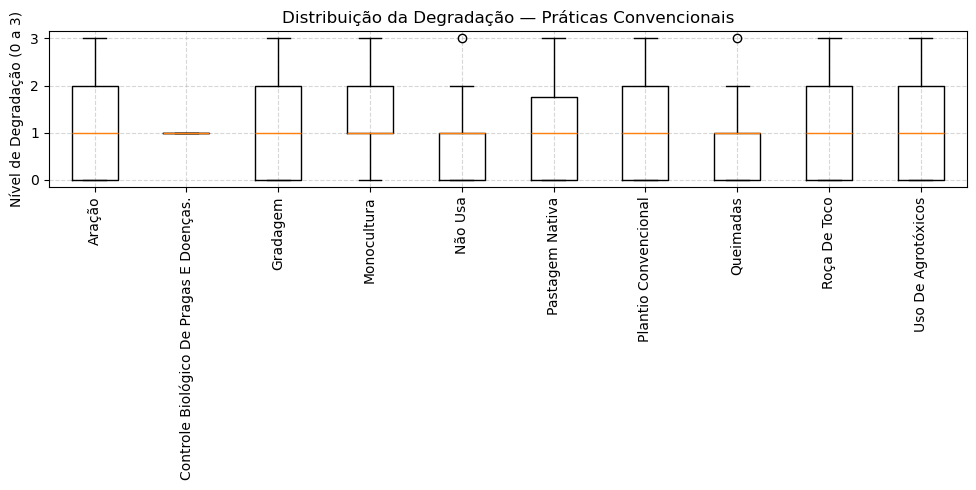

C:\Users\Valentine\AppData\Local\Temp\ipykernel_12672\2972223440.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[p.replace("pratica_", "").replace("_", " ").title() for p in praticas])


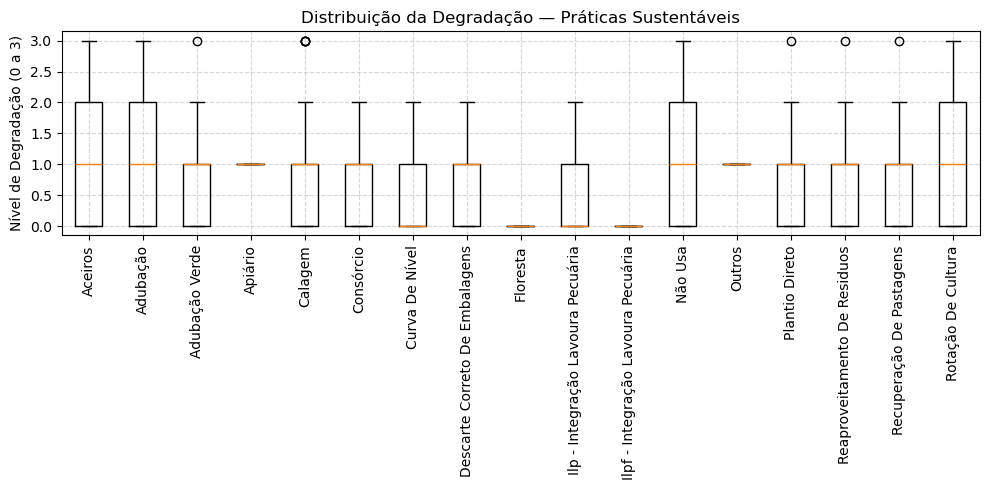

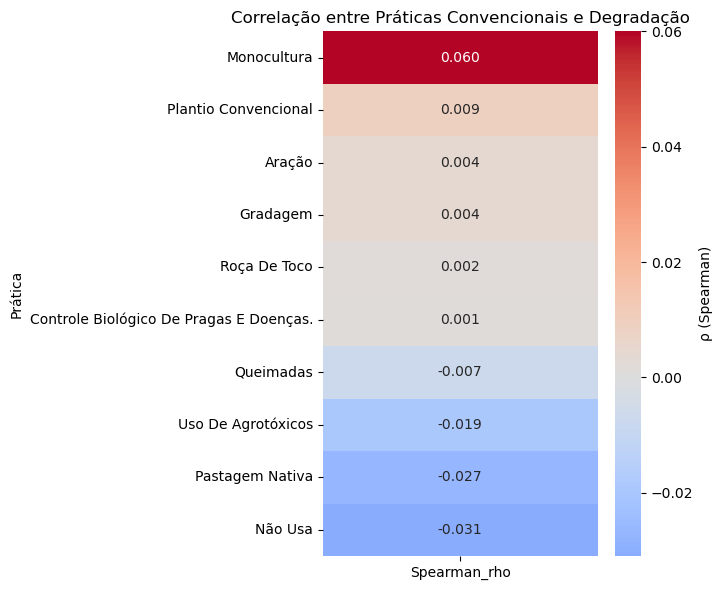

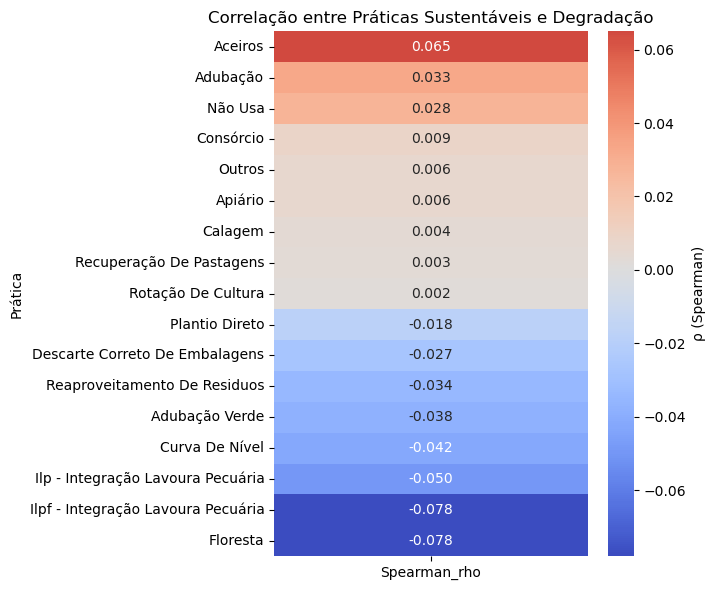

Práticas mantidas (9): ['aração', 'gradagem', 'monocultura', 'não usa', 'pastagem nativa', 'plantio convencional', 'queimadas', 'roça de toco', 'uso de agrotóxicos']
Práticas mantidas (13): ['aceiros', 'adubação', 'adubação verde', 'calagem', 'consórcio', 'curva de nível', 'descarte correto de embalagens', 'ilp - integração lavoura pecuária', 'não usa', 'plantio direto', 'reaproveitamento de residuos', 'recuperação de pastagens', 'rotação de cultura']


C:\Users\Valentine\AppData\Local\Temp\ipykernel_12672\2972223440.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[p.replace("pratica_", "").replace("_", " ").title() for p in praticas])


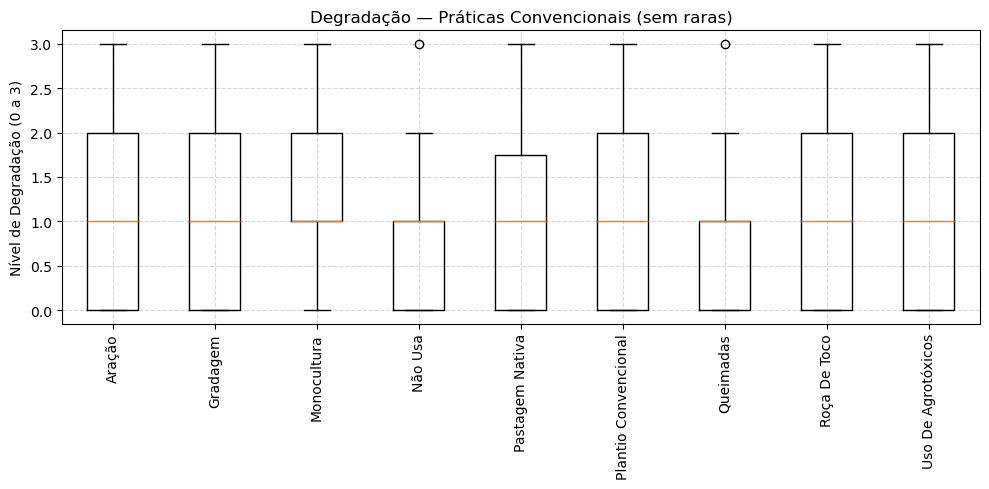

C:\Users\Valentine\AppData\Local\Temp\ipykernel_12672\2972223440.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[p.replace("pratica_", "").replace("_", " ").title() for p in praticas])


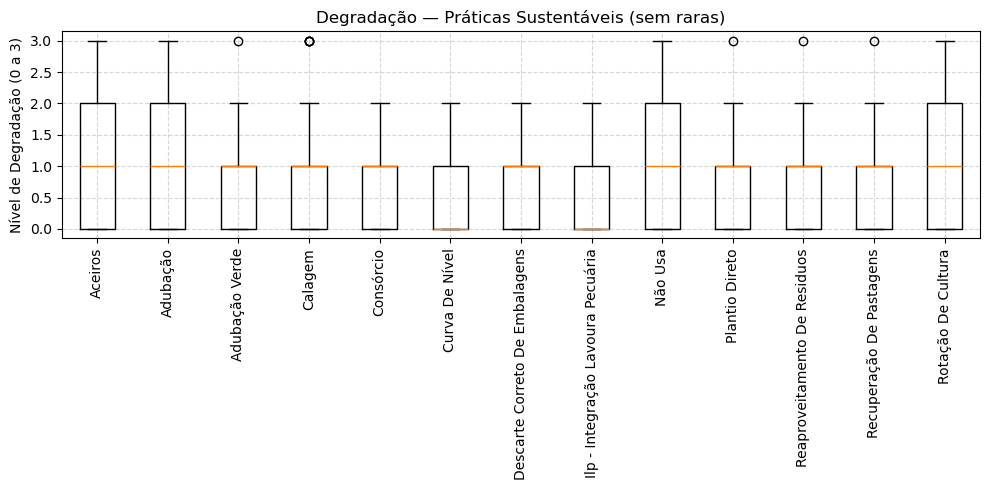

In [ ]:
# %% [markdown]
# # Visualizações dos Resultados — Práticas Agrícolas e Degradação
# Gera gráficos comparativos (Boxplot, Heatmap e Correlação) 
# para práticas sustentáveis e convencionais, com e sem variáveis raras.

# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# %% [markdown]
# ## 1. Carregar dados

# %%
# Caminhos dos arquivos
path_conv = r"C:/Users/Valentine/Artigo_Mapitos/data_analysis/correlacoes_conv_degr.csv"
path_sust = r"C:/Users/Valentine\Artigo_Mapitos/data_analysis/correlacoes_sust_degr.csv"

# Carregar CSVs
conv = pd.read_csv(path_conv, sep=",")
sust = pd.read_csv(path_sust, sep=",")

# Limpar colunas
conv.columns = conv.columns.str.strip()
sust.columns = sust.columns.str.strip()

# %% [markdown]
# ## 2. Boxplots — Distribuição dos níveis de degradação

# %%
# Caminhos das bases codificadas (linha a linha)
path_cod_conv = r"C:/Users/Valentine/Artigo_Mapitos/data_clean/07_Codificado/07_Convencionais_Degradacao_Linha.csv"
path_cod_sust = r"C:/Users/Valentine/Artigo_Mapitos/data_clean/07_Codificado/07_Sustentaveis_Degradacao_Linha.csv"

df_conv = pd.read_csv(path_cod_conv)
df_sust = pd.read_csv(path_cod_sust)

# Apenas as colunas relevantes
df_conv = df_conv.filter(regex="pratica_|degradacao", axis=1)
df_sust = df_sust.filter(regex="pratica_|degradacao", axis=1)

# Converter True/False para 1/0
df_conv = df_conv.replace({True: 1, False: 0})
df_sust = df_sust.replace({True: 1, False: 0})

# Função auxiliar para plotar boxplot
def boxplots_por_pratica(df, titulo):
    plt.figure(figsize=(10, 5))
    praticas = [c for c in df.columns if "pratica_" in c]
    data = []
    for p in praticas:
        sub = df[df[p] == 1]["degradacao_ord"]
        data.append(sub)
    plt.boxplot(data, labels=[p.replace("pratica_", "").replace("_", " ").title() for p in praticas])
    plt.xticks(rotation=90)
    plt.title(titulo)
    plt.ylabel("Nível de Degradação (0 a 3)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# %%
boxplots_por_pratica(df_conv, "Distribuição da Percepção de Degradação — Práticas Convencionais")
boxplots_por_pratica(df_sust, "Distribuição da Percepção de Degradação — Práticas Sustentáveis")

# %% [markdown]
# ## 3. Heatmap de correlações (Spearman)

# %%
def heatmap_correlacoes(df_corr, titulo):
    df_corr = df_corr.sort_values("Spearman_rho", ascending=False)
    plt.figure(figsize=(7, 6))
    sns.heatmap(
        df_corr.set_index("Prática")[["Spearman_rho"]],
        annot=True, cmap="coolwarm", center=0, fmt=".3f", cbar_kws={"label": "ρ (Spearman)"}
    )
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

# %%
heatmap_correlacoes(conv, "Correlação entre Práticas Convencionais e Percepção de Degradação")
heatmap_correlacoes(sust, "Correlação entre Práticas Sustentáveis e Percepção de Degradação")

# %% [markdown]
# ## 4. Remover práticas raras e comparar
# Elimina variáveis com frequência < 10 observações.

# %%
def remover_praticas_raras(df_cod, limite=10):
    praticas = [c for c in df_cod.columns if "pratica_" in c]
    frequencias = df_cod[praticas].sum()
    comuns = frequencias[frequencias >= limite].index.tolist()
    print(f"Práticas mantidas ({len(comuns)}): {[p.replace('pratica_', '') for p in comuns]}")
    return df_cod[["degradacao_ord"] + comuns]

df_conv_limpo = remover_praticas_raras(df_conv)
df_sust_limpo = remover_praticas_raras(df_sust)

# %%
boxplots_por_pratica(df_conv_limpo, "Percepção de Degradação — Práticas Convencionais (sem raras)")
boxplots_por_pratica(df_sust_limpo, "Percepção de Degradação — Práticas Sustentáveis (sem raras)")
